In [1]:
import numpy as np
import matplotlib
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
path1 = 'inelasticDarkMatter/nuevoScan/'

In [3]:
def calc_mchi2(mchi1, ma, gx, f):
    vphi = ma / (2*gx)
    return mchi1 + 2*f*vphi

def calc_lim_ms2(alphad, ma):
    return ma**2 / (4*np.sqrt(np.pi)* alphad)


def calc_values(df_dat):
    mx1 = df_dat.column('Mx1')
    yf = df_dat.column('yf')
    vphi = df_dat.column('MAp') / (2*df_dat.column('gX'))
    mx2 = mx1 + 2*yf*vphi
    df_dat['Mx2'] =  mx2
    df_dat['delta'] = df_dat.column('Mx2') - df_dat.column('Mx1')
    df_dat['alphad'] = (df_dat.column('gX')**2)/(4*np.pi)
    df_dat['alphaf'] = (df_dat.column('yf')**2)/(4*np.pi)
    #df_dat['ratio_ms2_map'] = df_dat.column('Ms2')**2 / calc_lim_ms2(df_dat.column('alphad'),df_dat.column('MAp'))
    df_dat['mass_relative'] = df_dat.column('delta') / df_dat.column('Mx1')
    return df_dat

def convertir_elementos(df_):
    # Crear una copia del DataFrame original
    df = df_.copy() 
        
    # Convertir y redondear las columnas numéricas
    df['Mchi1'] = df['Mchi1'] * 1e3 
    df['MAp'] = df['MAp'] * 1e3
    df['mphi'] = df['mphi'] * 1e3
    
    # Renombrar las columnas
    df = df.relabel('Mchi1', 'Mx1')
    df = df.relabel('Mchi2', 'Mx2')
    df = df.relabel('mphi', 'Ms2')
    df = df.relabel('ff', 'yf')
    df = df.relabel('angle', 'st')
    df = calc_values(df)
    return df 


def cargado_archivos(archivos):
    """
    Combina múltiples archivos CSV en una única tabla, manejando archivos vacíos o inexistentes.

    Args:
        archivos (list): Lista de rutas de archivos CSV.

    Returns:
        Table: Tabla combinada. Si no hay archivos válidos, retorna una tabla vacía.
    """
    datos = None  # Inicializamos como None para manejar el primer archivo válido

    for archivo in archivos:
        try:
            tabla_temp = Table.read_table(archivo)
            if tabla_temp.num_rows > 0:
                if datos is None:  # Primer archivo válido
                    datos = tabla_temp
                else:
                    datos.append(tabla_temp)  # Append a la tabla existente
        except FileNotFoundError:
            print(f"Error: {archivo} no existe.")
        except Exception as e:  # Otros errores (ej: formato incorrecto)
            print(f"Error al cargar {archivo}: {str(e)}")

    return Table() if datos is None else datos  # Retorna tabla vacía si no hay datos


#Los valores reportados por Planck
val_exp = 0.12 #Valor observado
error = 0.001 #Error reportado por Planck 
#Queremos que el valor sea calculado a 3 sigma, o sea, 3 veces el error reportado por Planck 
sigma = 3
val_por = sigma *  error 
val_min = round(val_exp - val_por,3)
val_max = round(val_exp + val_por,3)

def omega(df_):
    global val_min, val_max
    df = df_.copy()
    df['Densidad reliquia'] = np.round(df.column('Densidad reliquia'),3)
    return df.where('Densidad reliquia', are.between_or_equal_to(val_min,val_max))



In [4]:
def graficar_densidad_reliquia(df):
    plt.figure(figsize=(7, 5))  # Ancho mayor para 3 gráficos


    #plt.plot(df_5.column('Mx1'), df_5.column('Densidad reliquia'),'.',color='blue',alpha=0.5)
    plt.plot(df.column('Mx1'), df.column('Densidad reliquia'), 
             '.', color='blue', alpha=0.7, markersize=8)
    plt.axhline(y=val_min, color='red', linestyle='--', linewidth=1)
    plt.axhline(y=val_max, color='red', linestyle='--', linewidth=1)
    plt.ylabel(r'$\Omega h^2$', fontsize=14)
    plt.xlabel(r'$M_{\chi_{1}}$ (GeV)', fontsize=14)
    plt.ylim(0.115, 0.125)
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.xscale('log')
    plt.yscale('linear')
    
    
    plt.tight_layout()

def graficar_epsilon(df):
    plt.figure(figsize=(10,7))
    plt.plot(df.column('Mx1'), df.column('epsilon') ,'.',color='blue',alpha=0.5)
    plt.xscale('log')
    plt.yscale('log')
    plt.ylabel(r'$\epsilon$',size=20)
    plt.xlabel(r'$M_{\chi_{1}}$ (MeV)',size=20)
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    #plt.legend(fontsize=12, framealpha=0.9, loc='best')
    #plt.title(r'$\Delta \geq 2m_{e}$',size=20)
    plt.xlim(0.9,1e3+100)

def graficar_y(df):
    alpha = df.column('alphad')[0]
    ratio = round((df.column('Mx1') / df.column('MAp')).item(0),3)
    factor = alpha * ratio**4 
    plt.figure(figsize=(10,7))
    plt.plot(df.column('Mx1'), df.column('epsilon')**2 * factor ,'.',color='blue',alpha=0.5)
    plt.xscale('log')
    plt.yscale('log')
    plt.ylabel(r'$y = \alpha_{D}\epsilon^2(M_{\chi_{1}}/M_{A^\prime})^{4}$',size=20)
    plt.xlabel(r'$M_{\chi_{1}}$ (MeV)',size=20)
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    #plt.legend(fontsize=12, framealpha=0.9, loc='best')
    #plt.title(r'$\Delta \geq 2m_{e}$',size=20)
    plt.xlim(0.9,1e3+100)

In [5]:
archivos1 = [f'{path1}analisis_delta0p01MeV_new_1.csv',
            f'{path1}analisis_delta0p01MeV_new_2.csv',
            f'{path1}analisis_delta0p01MeV_new_3.csv',
            f'{path1}analisis_delta0p01MeV_new_4.csv']

df_0p01 = cargado_archivos(archivos1)

df_0p01 = convertir_elementos(df_0p01)
df_0p01 = calc_values(df_0p01)
df_0p01.show(3)
df_omega_0p01 = omega(df_0p01)
df_omega_0p01.show(3)

MAp,Ms2,Mx1,st,gX,epsilon,yf,Mx2,Densidad reliquia,loglikelihood,delta,alphad,alphaf,mass_relative
3.25194,785.832,1.08398,0.0001,2.50663,9.87319e-05,0.00770809,1.09398,3.07e-05,7.19632,0.01,0.5,4.72807e-06,0.00922525
579.563,1.97509,193.188,0.0001,2.50663,0.000421475,4.32503e-05,193.198,0.00703,6.37953,0.01,0.5,1.48857e-10,5.17632e-05
230.367,2403.16,76.7889,0.0001,2.50663,1.74994e-06,0.00010881,76.7989,47.6,99.4877,0.01,0.5,9.42174e-10,0.000130227


MAp,Ms2,Mx1,st,gX,epsilon,yf,Mx2,Densidad reliquia,loglikelihood,delta,alphad,alphaf,mass_relative
58.4841,9042.65,19.4947,0.0001,2.50663,1.09854e-05,0.0004286,19.5047,0.118,0.00186982,0.01,0.5,1.46182e-08,0.00051296
8.34648,11.1429,2.78216,0.0001,2.50663,1.96282e-06,0.00300321,2.79216,0.119,0.000466938,0.01,0.5,7.17733e-07,0.00359433
855.106,1.32962,285.035,0.0001,2.50663,0.000140741,2.93136e-05,285.045,0.118,0.00186982,0.01,0.5,6.83801e-11,3.50834e-05


In [6]:
print("Tamaños")
print(df_0p01.num_rows, len(df_0p01))
print(df_omega_0p01.num_rows, len(df_omega_0p01))

Tamaños
626416 14
122111 14


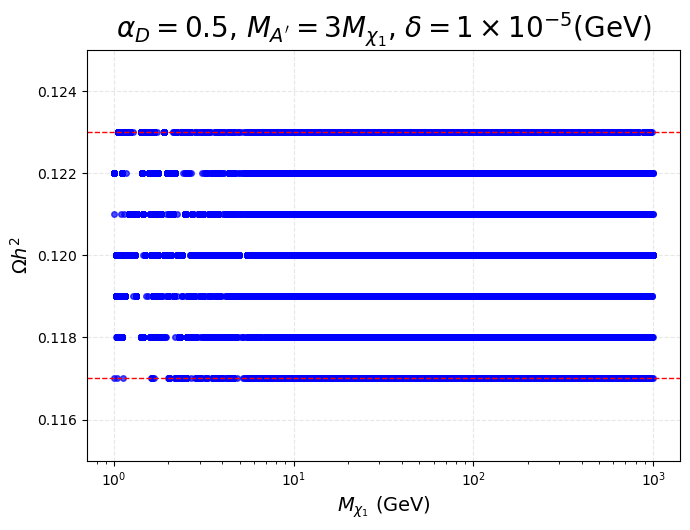

In [7]:
# Configuración de la figura
graficar_densidad_reliquia(df_omega_0p01)
plt.title(r'$\alpha_{D} = 0.5\text{, } M_{A^{\prime}} = 3 M_{\chi_{1}}\text{, } \delta = 1\times 10^{-5}$(GeV)',size=20, y=1.01)
plt.show()

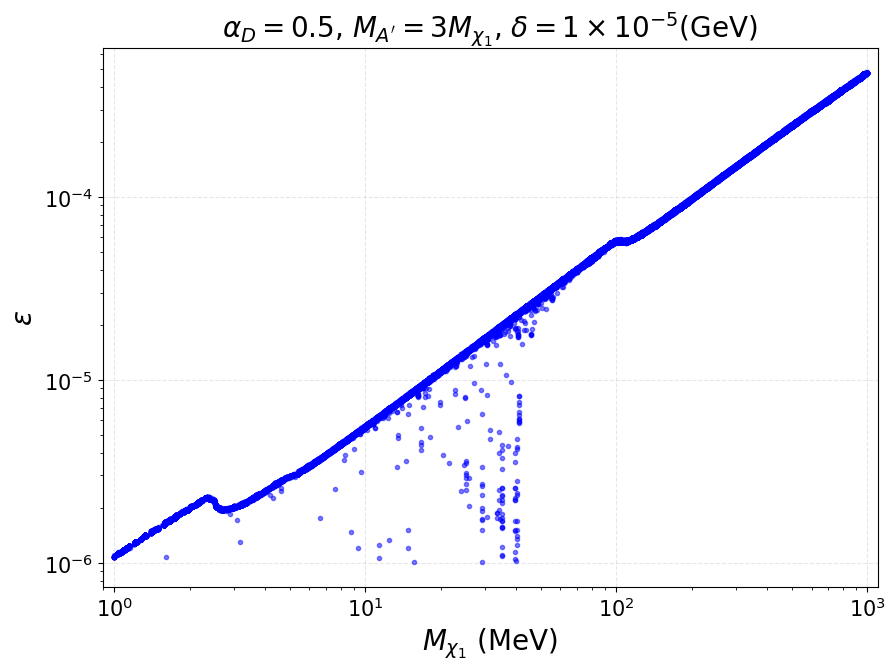

In [8]:
graficar_epsilon(df_omega_0p01)
plt.title(r'$\alpha_{D} = 0.5\text{, } M_{A^{\prime}} = 3 M_{\chi_{1}}\text{, } \delta = 1\times 10^{-5}$(GeV)',size=20)
plt.show()

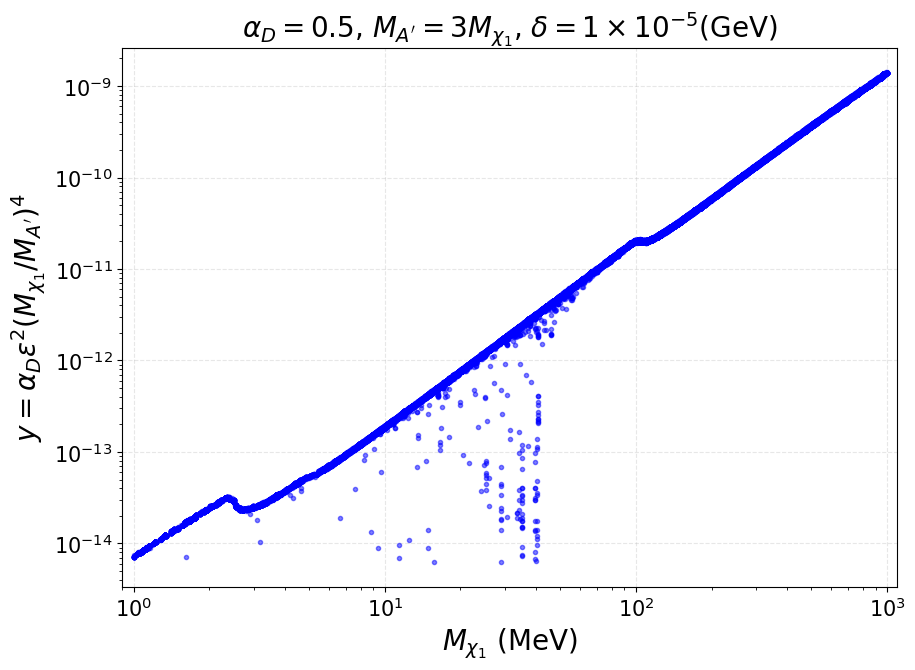

In [9]:
graficar_y(df_omega_0p01)
plt.title(r'$\alpha_{D} = 0.5\text{, } M_{A^{\prime}} = 3 M_{\chi_{1}}\text{, } \delta = 1\times 10^{-5}$(GeV)',size=20)
plt.show()

In [10]:
archivos1 = [f'{path1}analisis_delta0p05MeV_new_1.csv',
            f'{path1}analisis_delta0p05MeV_new_2.csv',]

df_0p05 = cargado_archivos(archivos1)

df_0p05 = convertir_elementos(df_0p05)
df_0p05 = calc_values(df_0p05)
df_omega_0p05 = omega(df_0p05)
df_0p05.show(3)
df_omega_0p05.show(3)

MAp,Ms2,Mx1,st,gX,epsilon,yf,Mx2,Densidad reliquia,loglikelihood,delta,alphad,alphaf,mass_relative
25.8226,7840.17,8.60752,0.0001,2.50663,6.2305e-06,0.00485356,8.65752,0.0753,0.971502,0.05,0.5,1.87461e-06,0.00580887
297.993,150.902,99.3309,0.0001,2.50663,1.29262e-06,0.000420585,99.3809,122,99.802,0.05,0.5,1.40766e-08,0.000503368
2863.16,603.438,954.385,0.0001,2.50663,0.000155886,4.37739e-05,954.435,0.903,60.3785,0.05,0.5,1.52483e-10,5.23898e-05


MAp,Ms2,Mx1,st,gX,epsilon,yf,Mx2,Densidad reliquia,loglikelihood,delta,alphad,alphaf,mass_relative
579.062,15.3436,193.021,0.0001,2.50663,9.57171e-05,0.000216439,193.071,0.117,0.00421173,0.05,0.5,3.72787e-09,0.00025904
108.259,3425.33,36.0865,0.0001,2.50663,2.04122e-05,0.0011577,36.1365,0.121,0.000465894,0.05,0.5,1.06654e-07,0.00138556
54.2721,33.6254,18.0907,0.0001,2.50663,1.01804e-05,0.00230931,18.1407,0.12,0,0.05,0.5,4.24381e-07,0.00276385


In [11]:
print("Tamaños")
print(df_0p05.num_rows, len(df_0p05))
print(df_omega_0p05.num_rows, len(df_omega_0p05))

Tamaños
525308 14
99423 14


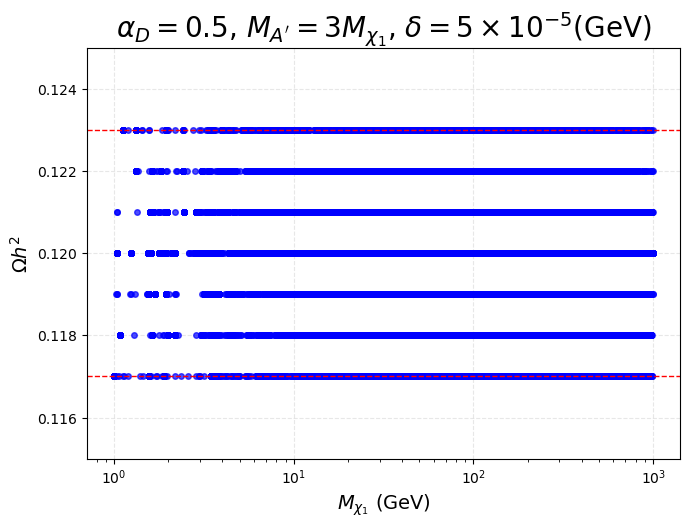

In [12]:
graficar_densidad_reliquia(df_omega_0p05)
plt.title(r'$\alpha_{D} = 0.5\text{, } M_{A^{\prime}} = 3 M_{\chi_{1}}\text{, } \delta = 5\times 10^{-5}$(GeV)',size=20)
plt.show()

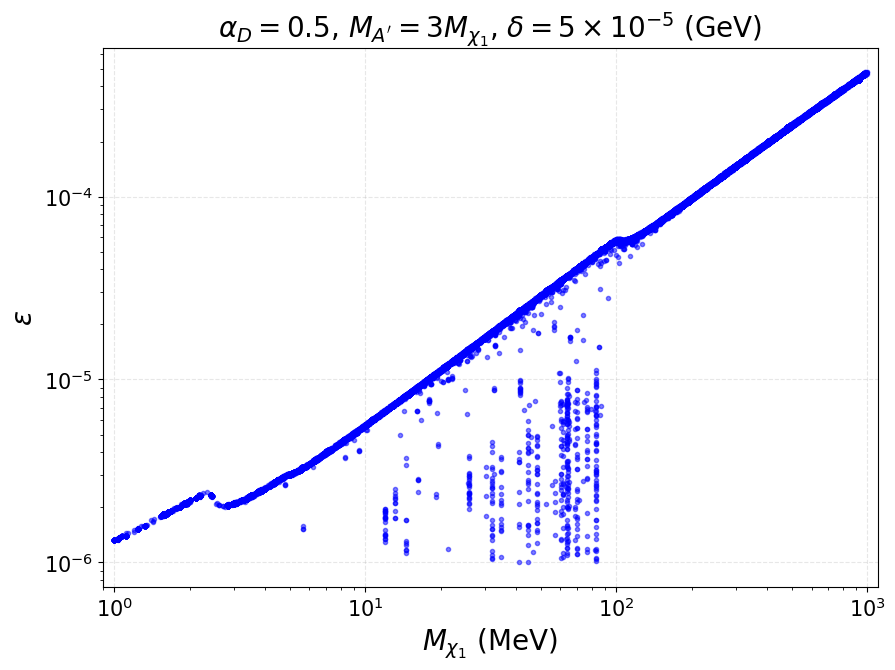

In [13]:
graficar_epsilon(df_omega_0p05)
plt.title(r'$\alpha_{D} = 0.5\text{, } M_{A^{\prime}} = 3 M_{\chi_{1}}\text{, } \delta = 5\times 10^{-5}$ (GeV)',size=20)
plt.show()

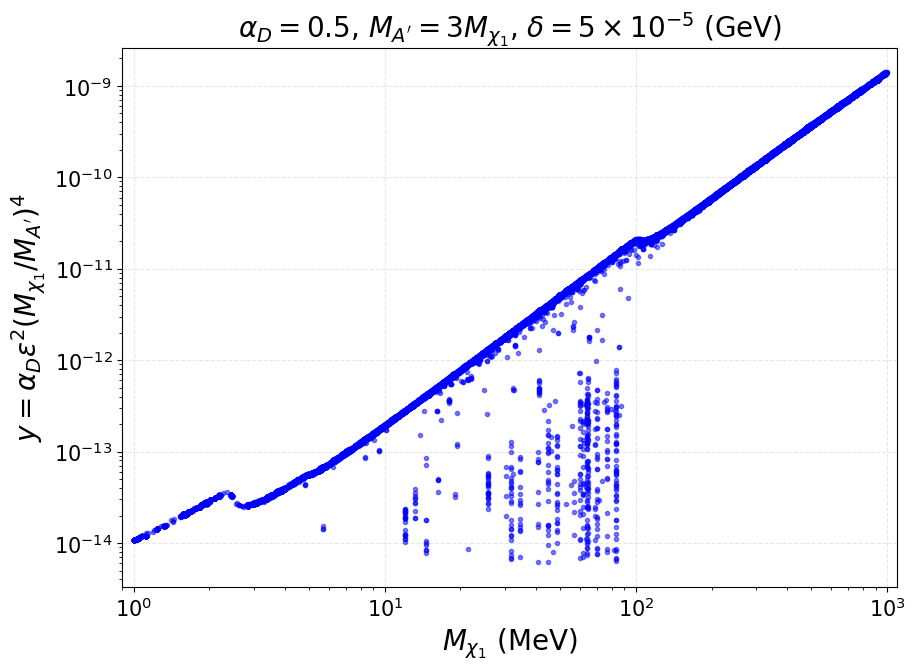

In [14]:
graficar_y(df_omega_0p05)
plt.title(r'$\alpha_{D} = 0.5\text{, } M_{A^{\prime}} = 3 M_{\chi_{1}}\text{, } \delta = 5\times 10^{-5}$ (GeV)',size=20)
plt.show()

In [15]:
archivos1 = [f'{path1}analisis_delta0p1MeV_alpha0p5_1.csv',
            f'{path1}analisis_delta0p1MeV_alpha0p5_2.csv',]

df_0p1 = cargado_archivos(archivos1)

df_0p1 = convertir_elementos(df_0p1)
df_0p1 = calc_values(df_0p1)
df_omega_0p1 = omega(df_0p1)
df_0p1.show(3)
df_omega_0p1.show(3)

MAp,Ms2,Mx1,st,gX,epsilon,yf,Mx2,Densidad reliquia,loglikelihood,delta,alphad,alphaf,mass_relative
37.6802,20.6197,12.5601,0.0001,2.50663,1.48532e-05,0.00665237,12.6601,0.0308,3.95954,0.1,0.5,3.52162e-06,0.00796173
6.88856,526.981,2.29619,0.0001,2.50663,0.000291262,0.0363883,2.39619,2.81e-05,7.19663,0.1,0.5,0.000105369,0.0435504
5.25561,1005.12,1.75187,0.0001,2.50663,2.62031e-05,0.0476943,1.85187,0.00169,6.99853,0.1,0.5,0.000181019,0.0570818


MAp,Ms2,Mx1,st,gX,epsilon,yf,Mx2,Densidad reliquia,loglikelihood,delta,alphad,alphaf,mass_relative
7.54811,818.212,2.51604,0.0001,2.50663,2.30453e-06,0.0332087,2.61604,0.118,0.00186982,0.1,0.5,8.77594e-05,0.0397451
131.285,6.92181,43.7618,0.0001,2.50663,2.38289e-05,0.0019093,43.8618,0.122,0.00186147,0.1,0.5,2.90093e-07,0.0022851
475.105,156.437,158.368,0.0001,2.50663,6.27546e-05,0.000527595,158.468,0.123,0.00418354,0.1,0.5,2.21509e-08,0.00063144


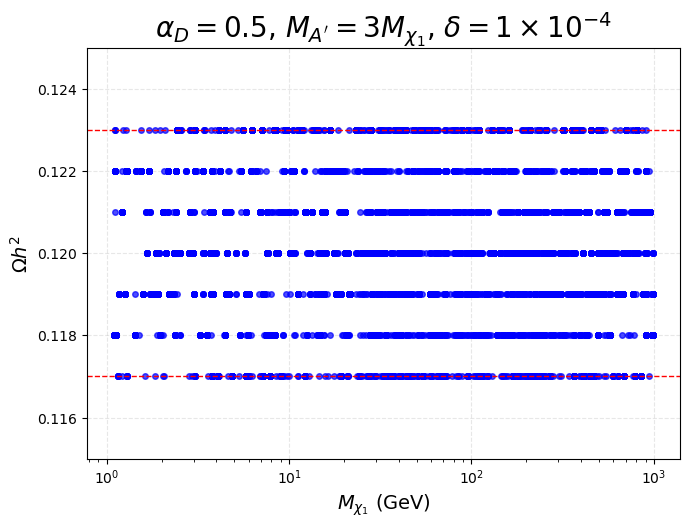

In [16]:
graficar_densidad_reliquia(df_omega_0p1)
plt.title(r'$\alpha_{D} = 0.5\text{, } M_{A^{\prime}} = 3 M_{\chi_{1}}\text{, } \delta = 1\times 10^{-4}$',size=20)
plt.show()

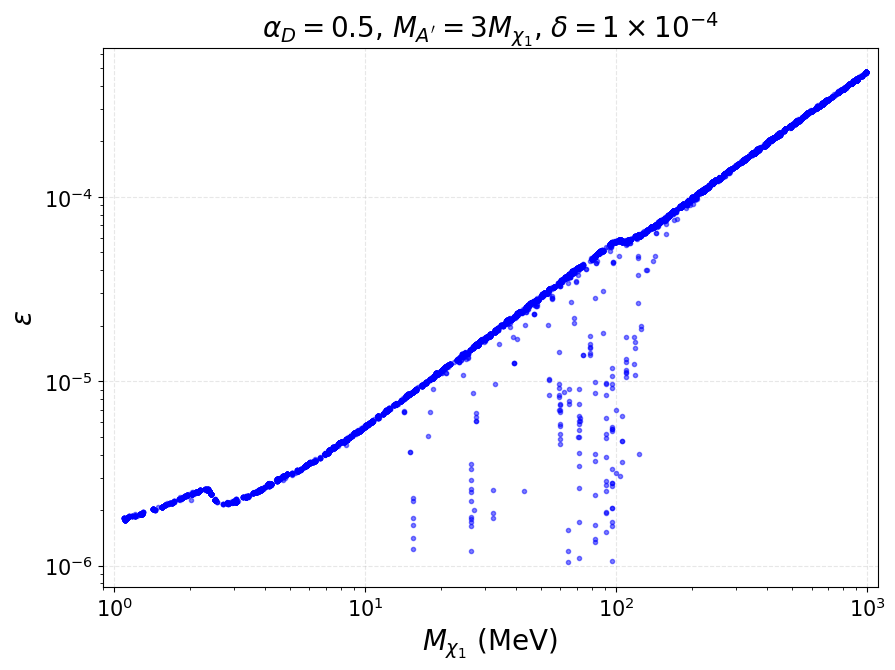

In [17]:
graficar_epsilon(df_omega_0p1)
plt.title(r'$\alpha_{D} = 0.5\text{, } M_{A^{\prime}} = 3 M_{\chi_{1}}\text{, } \delta = 1\times 10^{-4}$',size=20)
plt.show()

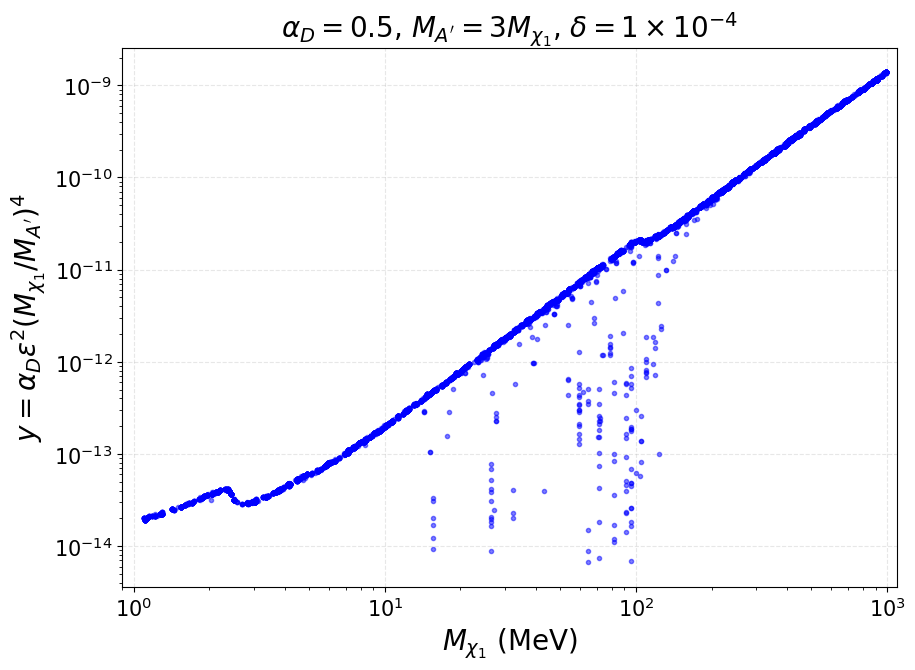

In [18]:
graficar_y(df_omega_0p1)
plt.title(r'$\alpha_{D} = 0.5\text{, } M_{A^{\prime}} = 3 M_{\chi_{1}}\text{, } \delta = 1\times 10^{-4}$',size=20)
plt.show()

In [19]:
archivos1 = [f'{path1}analisis_delta0p5MeV_alpha0p5_1.csv',
            f'{path1}analisis_delta0p5MeV_alpha0p5_2.csv',]

df_0p5 = cargado_archivos(archivos1)

df_0p5 = convertir_elementos(df_0p5)
df_0p5 = calc_values(df_0p5)
df_omega_0p5 = omega(df_0p5)
df_0p5.show(3)
df_omega_0p5.show(3)

MAp,Ms2,Mx1,st,gX,epsilon,yf,Mx2,Densidad reliquia,loglikelihood,delta,alphad,alphaf,mass_relative
17.9687,559.447,5.98958,0.0001,2.50663,3.27891e-06,0.0697497,6.48958,0.252,6.61242,0.5,0.5,0.000387146,0.0834783
10.0943,328.294,3.36477,0.0001,2.50663,4.05859e-05,0.124161,3.86477,0.00395,6.73328,0.5,0.5,0.00122675,0.148599
19.8137,4.01265,6.60458,0.0001,2.50663,3.62746e-05,0.0632548,7.10458,1.36e-07,7.19998,0.5,0.5,0.000318403,0.0757051


MAp,Ms2,Mx1,st,gX,epsilon,yf,Mx2,Densidad reliquia,loglikelihood,delta,alphad,alphaf,mass_relative
2092.44,4.85226,697.481,0.0001,2.50663,0.00034473,0.000598972,697.981,0.117,0.00421173,0.5,0.5,2.85498e-08,0.000716865
1358,1.40456,452.667,0.0001,2.50663,0.000223792,0.000922911,453.167,0.12,0,0.5,0.5,6.77812e-08,0.00110456
832.289,33.4954,277.43,0.0001,2.50663,0.000137058,0.00150586,277.93,0.121,0.000465894,0.5,0.5,1.80452e-07,0.00180226


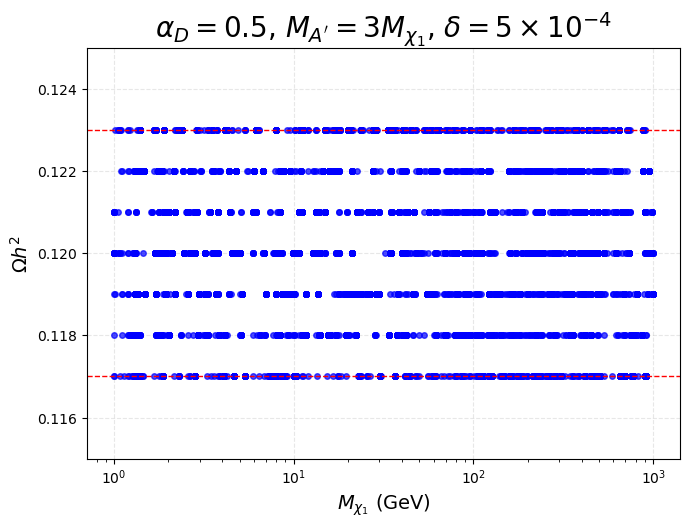

In [20]:
graficar_densidad_reliquia(df_omega_0p5)
plt.title(r'$\alpha_{D} = 0.5\text{, } M_{A^{\prime}} = 3 M_{\chi_{1}}\text{, } \delta = 5\times 10^{-4}$',size=20)
plt.show()

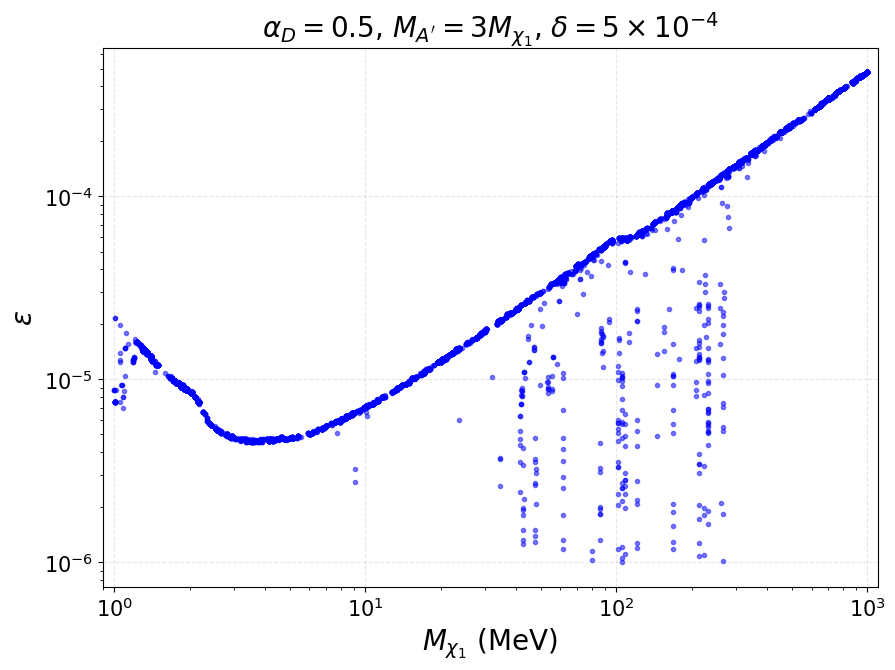

In [21]:
graficar_epsilon(df_omega_0p5)
plt.title(r'$\alpha_{D} = 0.5\text{, } M_{A^{\prime}} = 3 M_{\chi_{1}}\text{, } \delta = 5\times 10^{-4}$',size=20)
plt.show()

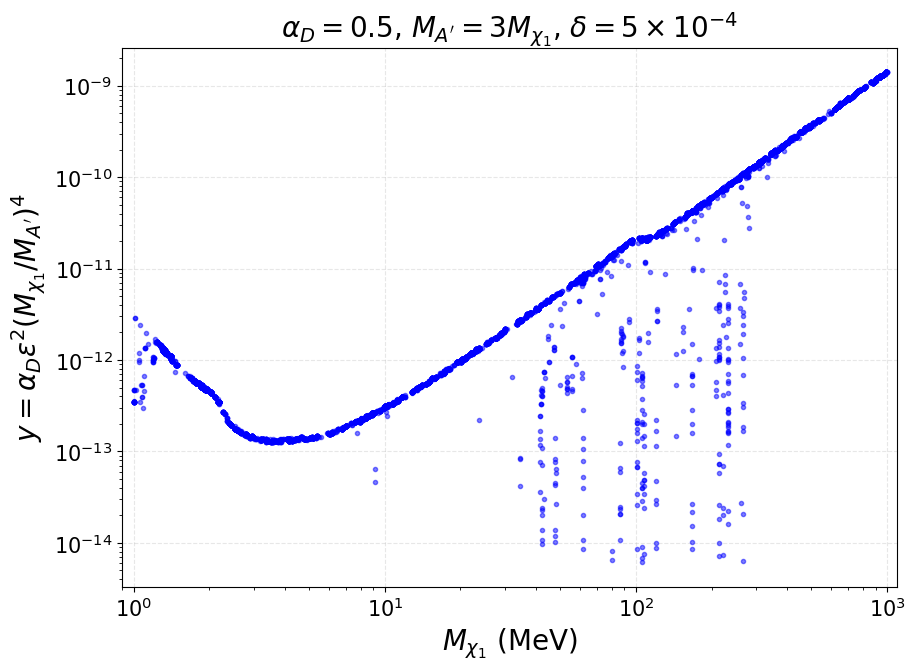

In [22]:
graficar_y(df_omega_0p5)
plt.title(r'$\alpha_{D} = 0.5\text{, } M_{A^{\prime}} = 3 M_{\chi_{1}}\text{, } \delta = 5\times 10^{-4}$',size=20)
plt.show()

In [23]:
archivos1 = [f'{path1}analisis_delta1MeV_alpha0p5_1.csv',
            f'{path1}analisis_delta1MeV_alpha0p5_2.csv',]

df_1 = cargado_archivos(archivos1)

df_1 = convertir_elementos(df_1)
df_1 = calc_values(df_1)
df_omega_1 = omega(df_1)
df_1.show(3)
df_omega_1.show(3)

MAp,Ms2,Mx1,st,gX,epsilon,yf,Mx2,Densidad reliquia,loglikelihood,delta,alphad,alphaf,mass_relative
1312.82,2.34464,437.607,0.0001,2.50663,1.81843e-06,0.00190935,438.607,196,99.8771,1,0.5,2.90108e-07,0.00228516
328.464,4097.11,109.488,0.0001,2.50663,1.2237e-06,0.00763137,110.488,148,99.837,1,0.5,4.63442e-06,0.00913343
53.8703,1427.74,17.9568,0.0001,2.50663,2.96241e-06,0.0465308,18.9568,1.74,81.3112,1,0.5,0.000172294,0.0556893


MAp,Ms2,Mx1,st,gX,epsilon,yf,Mx2,Densidad reliquia,loglikelihood,delta,alphad,alphaf,mass_relative
5.85431,275.67,1.95144,0.0001,2.50663,0.00066044,0.428168,2.95144,0.117,0.00421173,1,0.5,0.0145888,0.512443
60.035,817.28,20.0117,0.0001,2.50663,1.45318e-05,0.0417528,21.0117,0.122,0.00186147,1,0.5,0.000138727,0.0499708
312.683,10.7951,104.228,0.0001,2.50663,5.72425e-05,0.00801652,105.228,0.117,0.00421173,1,0.5,5.11402e-06,0.00959439


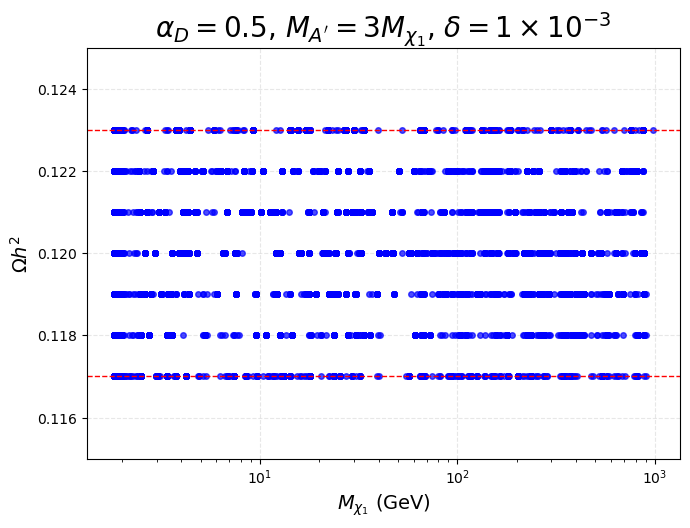

In [24]:
graficar_densidad_reliquia(df_omega_1)
plt.title(r'$\alpha_{D} = 0.5\text{, } M_{A^{\prime}} = 3 M_{\chi_{1}}\text{, } \delta = 1\times 10^{-3}$',size=20)
plt.show()

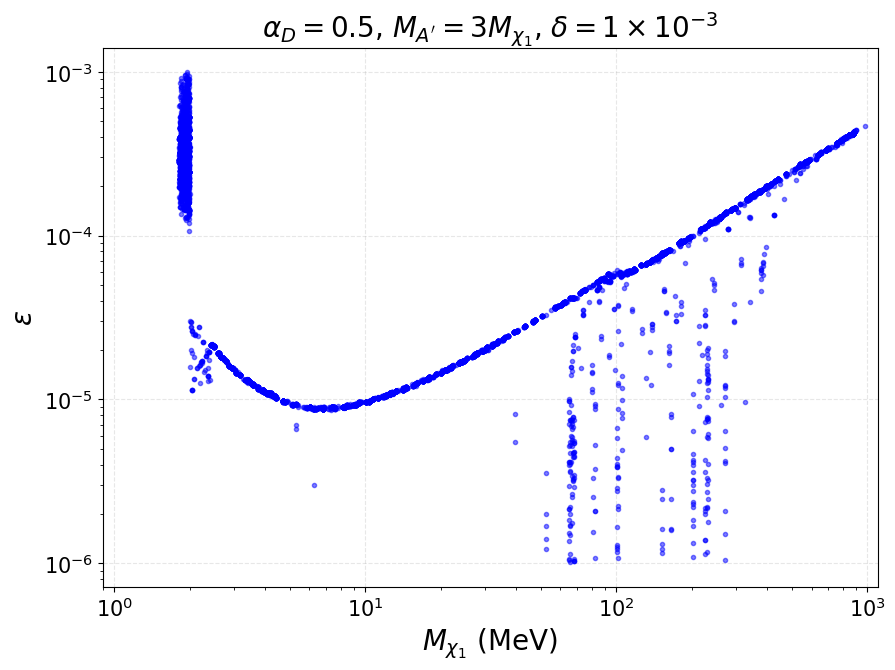

In [25]:
graficar_epsilon(df_omega_1)
plt.title(r'$\alpha_{D} = 0.5\text{, } M_{A^{\prime}} = 3 M_{\chi_{1}}\text{, } \delta = 1\times 10^{-3}$',size=20)
plt.show()

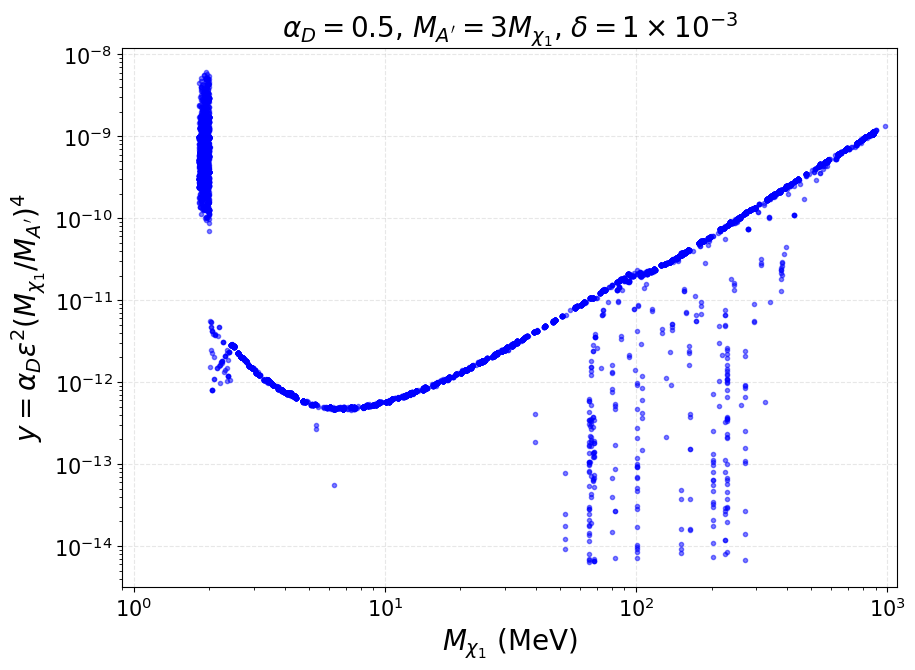

In [26]:
graficar_y(df_omega_1)
plt.title(r'$\alpha_{D} = 0.5\text{, } M_{A^{\prime}} = 3 M_{\chi_{1}}\text{, } \delta = 1\times 10^{-3}$',size=20)
plt.show()

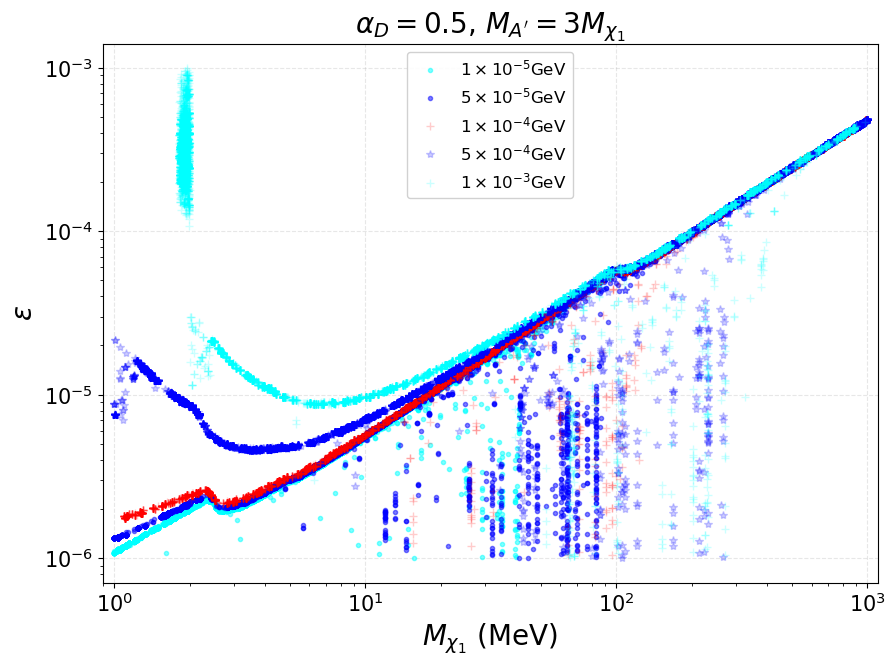

In [27]:
plt.figure(figsize=(10,7))
plt.title(r'$\alpha_{D} = 0.5\text{, } M_{A^{\prime}} = 3 M_{\chi_{1}}$',size=20)
plt.plot(df_omega_0p01.column('Mx1'), df_omega_0p01.column('epsilon') ,'.',color='cyan',alpha=0.5,label=r'$1\times 10^{-5}$GeV')
plt.plot(df_omega_0p05.column('Mx1'), df_omega_0p05.column('epsilon') ,'.',color='blue',alpha=0.5,label=r'$5\times 10^{-5}$GeV')
plt.plot(df_omega_0p1.column('Mx1'), df_omega_0p1.column('epsilon') ,'+',color='red',alpha=0.2,label=r'$1\times 10^{-4}$GeV')
plt.plot(df_omega_0p5.column('Mx1'), df_omega_0p5.column('epsilon') ,'*',color='blue',alpha=0.2,label=r'$5\times 10^{-4}$GeV')
plt.plot(df_omega_1.column('Mx1'), df_omega_1.column('epsilon') ,'+',color='cyan',alpha=0.2,label=r'$1\times 10^{-3}$GeV')
plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'$\epsilon$',size=20)
plt.xlabel(r'$M_{\chi_{1}}$ (MeV)',size=20)
plt.grid(True, linestyle='--', alpha=0.3)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=12, framealpha=0.9, loc='best')
plt.xlim(0.9,1e3+100)
plt.show()